<a href="https://colab.research.google.com/github/GenAIUnplugged/langchain_series/blob/main/langchain_basics/different_langchain_chains.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**What is "Stuffing"?** \
In LangChain, "stuff" refers to a strategy where:

You take multiple documents

You concatenate them into a single prompt

You pass the entire thing at once to the LLM

This is the simplest of LangChain’s retrieval strategies:

🔹**Stuffing = combine all context + user question → 1 big prompt**

In [1]:
!pip install langchain langchain-core langchain-community langchain_openai gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 26.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 437.7/437.7 kB 27.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.1/54.1 MB 15.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.9/322.9 kB 19.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.5/11.5 MB 80.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 48.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 3.8 MB/s eta 0:00:00
  Attempting uninstall: langchain-core
    Found existing 

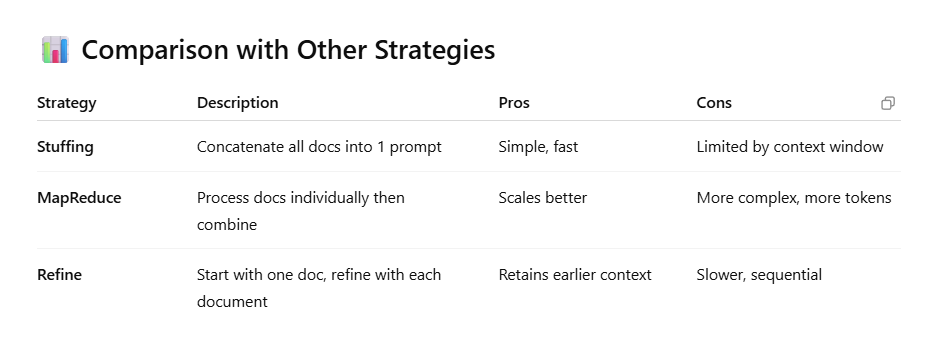

create_stuff_documents_chain() is a LangChain utility function that helps you quickly build a chain for document-based question answering using a simple prompt + a collection of documents.

In [4]:
from google.colab import userdata
import os
os.environ['OPENAI_API_KEY'] = userdata.get('OPENAI_API_KEY')

In [13]:
from langchain.chains.combine_documents import create_stuff_documents_chain
from langchain.prompts import PromptTemplate
from langchain.chat_models import ChatOpenAI

# 1. Define LLM
llm = ChatOpenAI(model="gpt-4o-mini",temperature=0)

# 2. Prompt template with placeholders
prompt = PromptTemplate(
    input_variables=["context","question"],
    template="""
Use the following context to answer the question:
{context}

Question: {question}
Answer:"""
)

# 3. Create a document-stuffing chain
stuff_chain = create_stuff_documents_chain(llm=llm, prompt=prompt)

# 4. Use the chain
from langchain.schema.document import Document

docs = [
    Document(page_content="Python is a programming language."),
    Document(page_content="LangChain helps build LLM applications.")
]

question = "What is LangChain?"

response = stuff_chain.invoke({
    "context": docs,
    "question": question
})
print(response)


LangChain is a framework that helps build applications using large language models (LLMs).


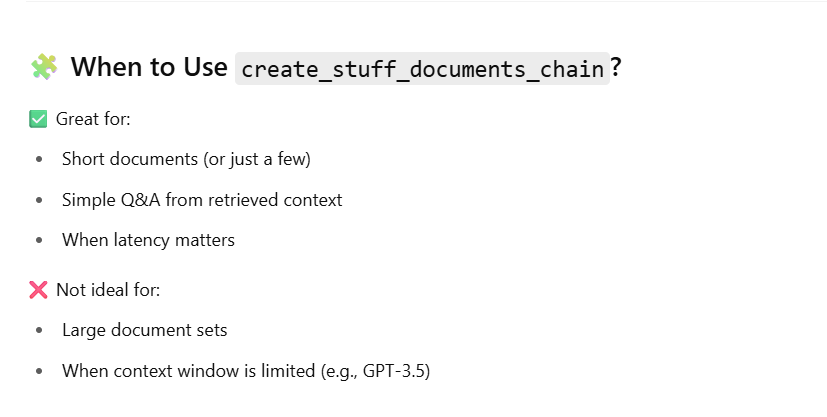

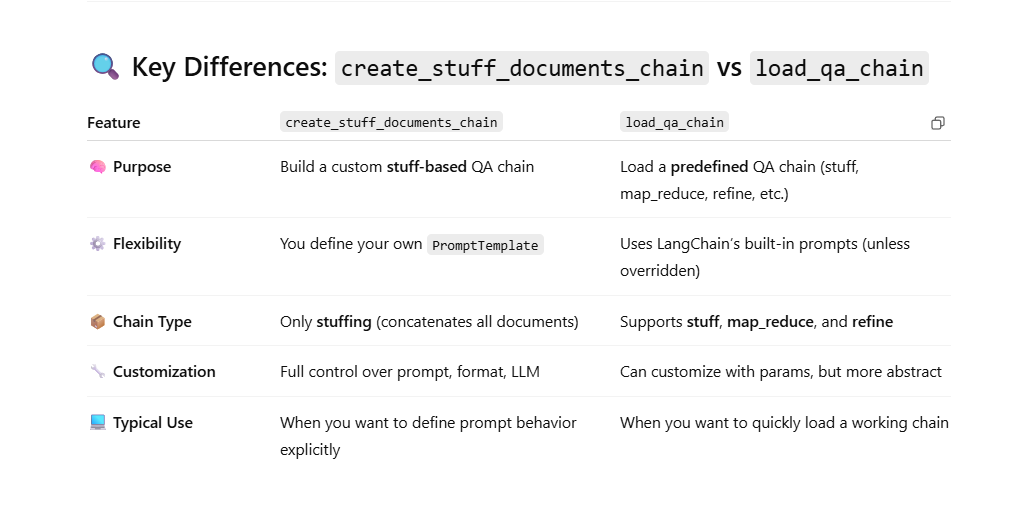

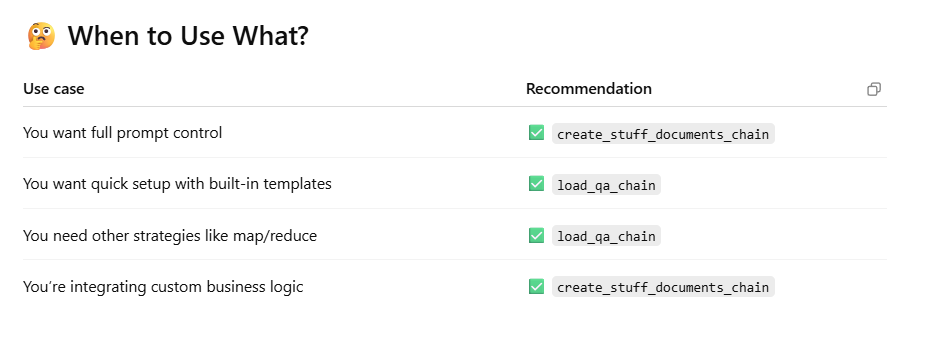

In [19]:
from langchain.chat_models import ChatOpenAI
from langchain.schema import Document
from langchain.prompts import PromptTemplate
from langchain.chains.combine_documents import create_stuff_documents_chain
from langchain.chains.question_answering import load_qa_chain

# 1. Shared setup
llm = ChatOpenAI(temperature=0,model="gpt-4o-mini")

docs = [
    Document(page_content="LangChain helps developers build LLM apps."),
    Document(page_content="It provides memory, chains, agents, and tools.")
]

question = "What does LangChain provide?"

# ---------------------------------------------
# Approach A: create_stuff_documents_chain
# ---------------------------------------------
prompt_manual = PromptTemplate(
    input_variables=["context", "question"],
    template="""
Use the following context to answer the question:
{context}

Question: {question}
Answer:"""
)

stuff_chain_manual = create_stuff_documents_chain(llm=llm, prompt=prompt_manual)

# Run the manual chain
response_manual = stuff_chain_manual.invoke({
    "context": docs,
    "question": question
})
print("🔧 Manual Chain Output:")
print(response_manual)

# ---------------------------------------------
# Approach B: load_qa_chain
# ---------------------------------------------
stuff_chain_prebuilt = load_qa_chain(llm=llm, chain_type="stuff")

# Run the built-in chain
# Run the manual chain
response_prebuilt = stuff_chain_prebuilt.invoke({
    "input_documents": docs,
    "question": question
})
print("\n⚙️ Prebuilt Chain Output:")
print(response_prebuilt)


🔧 Manual Chain Output:
LangChain provides memory, chains, agents, and tools to help developers build LLM apps.

⚙️ Prebuilt Chain Output:
{'input_documents': [Document(metadata={}, page_content='LangChain helps developers build LLM apps.'), Document(metadata={}, page_content='It provides memory, chains, agents, and tools.')], 'question': 'What does LangChain provide?', 'output_text': 'LangChain provides memory, chains, agents, and tools to help developers build LLM apps.'}


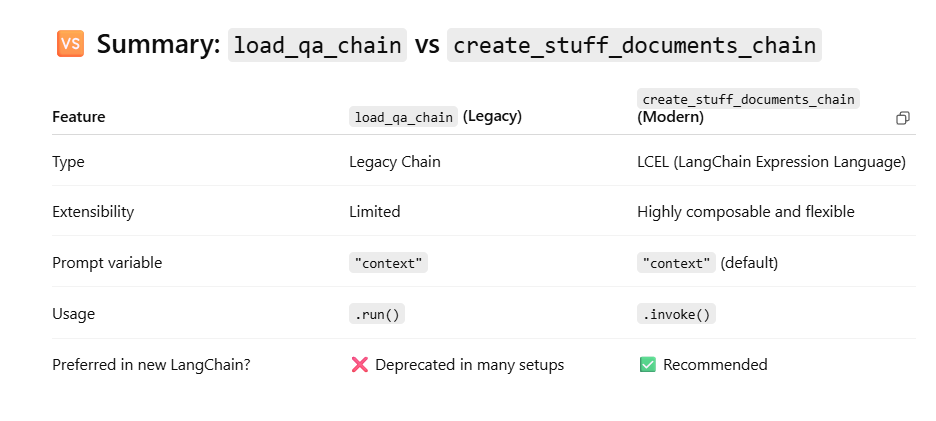

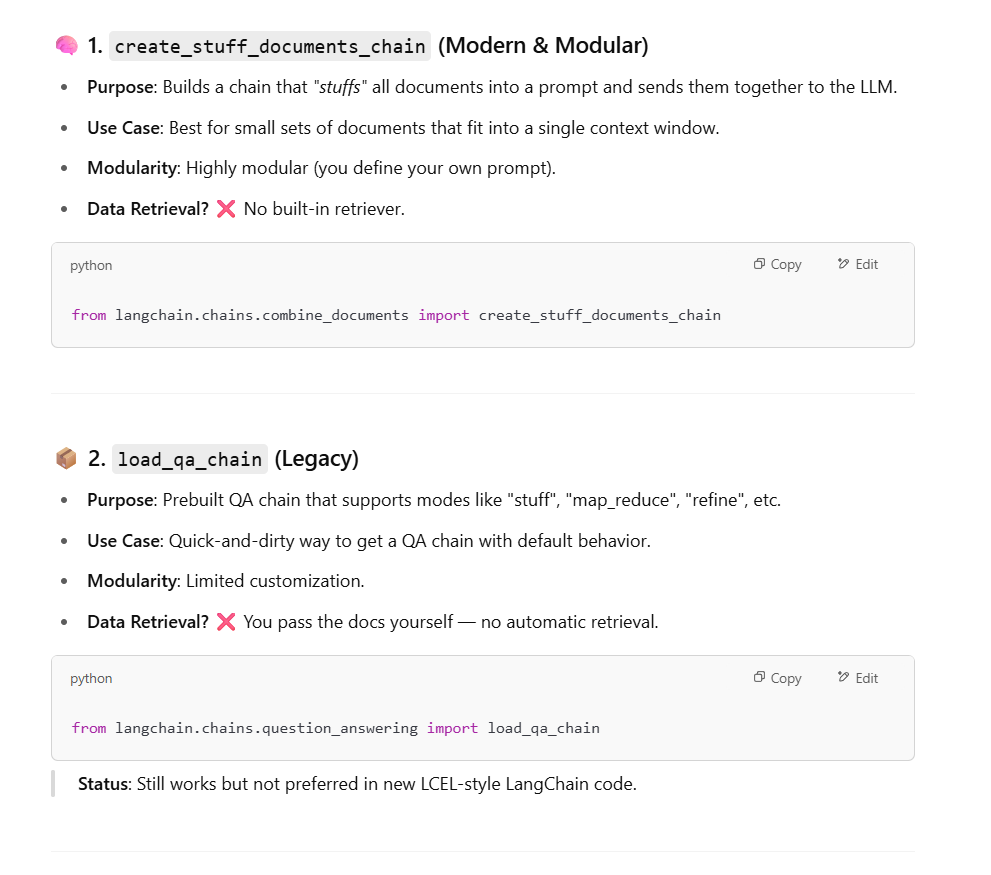

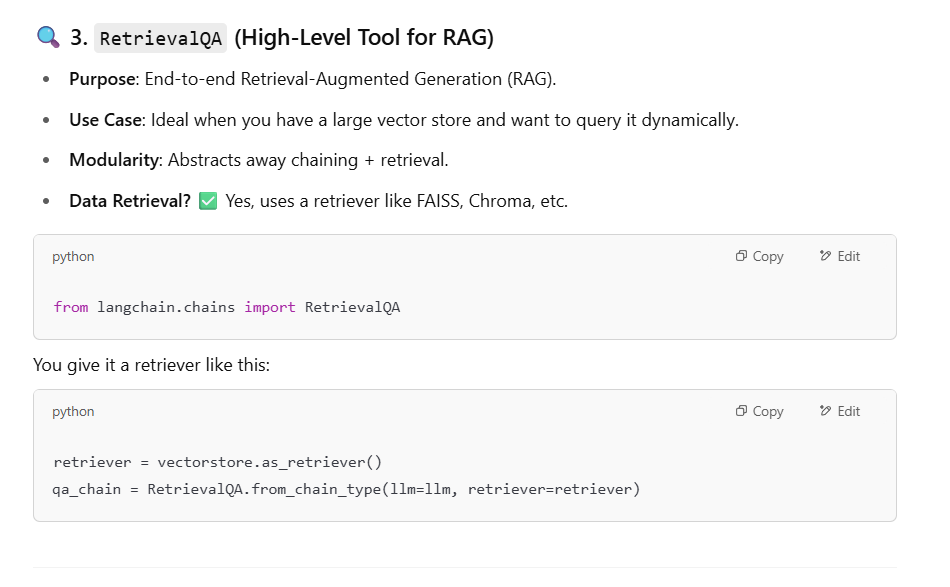

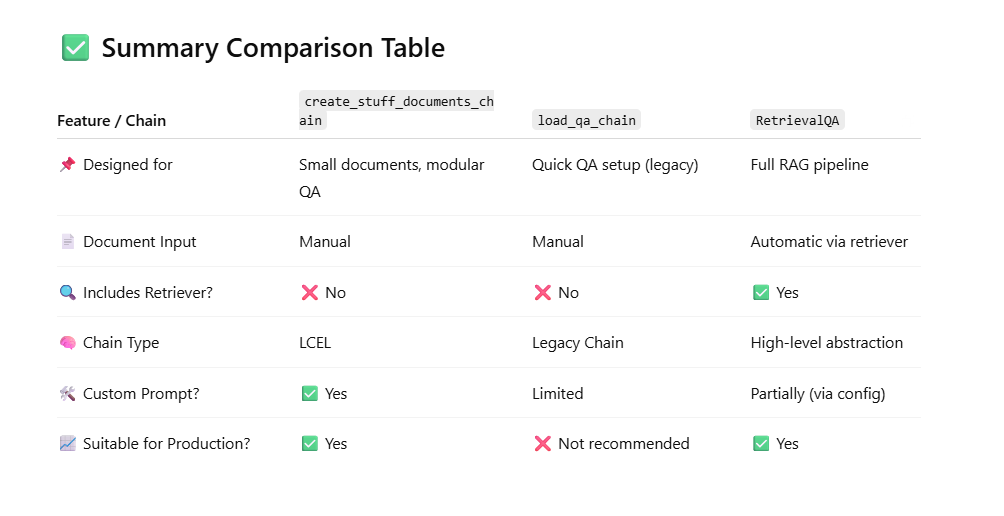

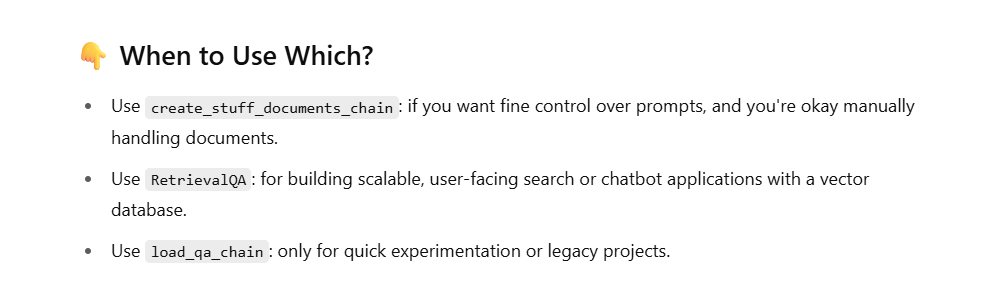

# RetrievalQA Chain

In [20]:
# Install dependencies if not already done
!pip install langchain faiss-cpu openai tiktoken

# 1. Import modules
from langchain.embeddings.openai import OpenAIEmbeddings
from langchain.vectorstores import FAISS
from langchain.chat_models import ChatOpenAI
from langchain.chains import RetrievalQA
from langchain.schema import Document

# 2. Prepare your documents
docs = [
    Document(page_content="LangChain is a framework for building LLM-powered applications."),
    Document(page_content="FAISS is a vector store for similarity search developed by Facebook."),
    Document(page_content="ChatGPT is an LLM developed by OpenAI.")
]

# 3. Create embeddings
embeddings = OpenAIEmbeddings()

# 4. Create vector store (FAISS)
vectorstore = FAISS.from_documents(docs, embedding=embeddings)

# 5. Create retriever from vectorstore
retriever = vectorstore.as_retriever()

# 6. Initialize your LLM
llm = ChatOpenAI(model="gpt-4o-mini", temperature=0)

# 7. Create RetrievalQA chain
qa_chain = RetrievalQA.from_chain_type(llm=llm, retriever=retriever)

# 8. Ask a question
query = "What is LangChain?"
response = qa_chain.invoke(query)
print("Answer:", response)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 31.3/31.3 MB 37.2 MB/s eta 0:00:00


<ipython-input-20-9d23830336c6>:19: LangChainDeprecationWarning: The class `OpenAIEmbeddings` was deprecated in LangChain 0.0.9 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-openai package and should be used instead. To use it run `pip install -U :class:`~langchain-openai` and import as `from :class:`~langchain_openai import OpenAIEmbeddings``.
  embeddings = OpenAIEmbeddings()


Answer: {'query': 'What is LangChain?', 'result': 'LangChain is a framework for building applications powered by large language models (LLMs).'}
